# Assignment 3 DIT406 

Carl Kindberg: 16 hours

In [2]:
# Used packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import time

In [3]:
data = pd.read_csv(r'C:\Users\kindb\Downloads\data_dat405\assignment3-data.csv') # Importing data

In [4]:
data  # Prints the data to get an overview of what we are dealing with. 
# Note that we have 29369 observations of 5 different features so it is a large dataset.

residue name  position chain         phi         psi
0              LYS        10     A -149.312855  142.657714
1              PRO        11     A  -44.283210  136.002076
2              LYS        12     A -119.972621 -168.705263
3              LEU        13     A -135.317212  137.143523
4              LEU        14     A -104.851467   95.928520
...            ...       ...   ...         ...         ...
29364          GLY       374     B -147.749557  155.223562
29365          GLN       375     B -117.428541  133.019506
29366          ILE       376     B -113.586448  112.091970
29367          ASN       377     B -100.668779  -12.102821
29368          LYS       378     B -169.951240   94.233680

[29369 rows x 5 columns]

# ---------------------------------------------------------------------------------------------------------------

#### Question 1. Show the distribution of phi and psi combinations using:
    
   #### a) A scatter plot
   
   #### b) A heatmap
    
# ---------------------------------------------------------------------------------------------------------------

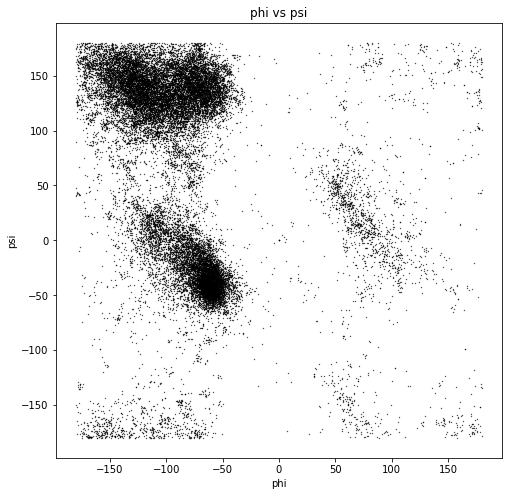

In [5]:
# Scatter plot of Phi vs Psi
# Marker is set to "s = 0.1" in order to get smaller marker and a nicer looking scatter plot.
plt.scatter(data = data, x = "phi", y = "psi", s = 0.1, color = "black")
plt.gcf().set_size_inches(8, 8)
plt.title('phi vs psi')
plt.xlabel('phi')
plt.ylabel('psi')
plt.show()


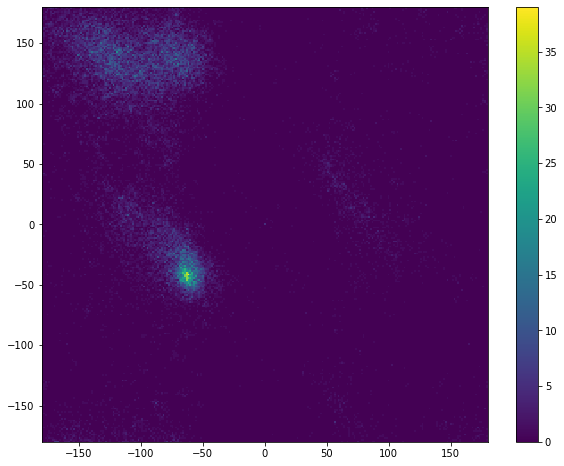

In [6]:
# From the plot we can see that most of the density is centered around x=-50, y=-50
plt.hist2d(data = data, x = "phi", y = "psi", bins = 250)
plt.gcf().set_size_inches(10, 8)
plt.colorbar()
plt.show()

# ---------------------------------------------------------------------------------------------------------------

#### Question 2. Use the K-means clustering method to cluster the phi and psi angle combinations in the data file.

# --------------------------------------------------------------------------------------------------------------

#### 2. a) Experiment with different values of K. Suggest an appropriate value of K for this task and motivate this choice.

In [6]:
num_clusters = range(2, 10) # Let the number of cluster vary from 2 to 9
runs = 5 # repeat the loop 5 times from different starting points

#  !!!! NOTE that we also initialize 5 times within the loop this is so we get a more stable result !!!


# Creates arrays to store the metrics
within_kmeans = np.zeros((len(num_clusters), runs), dtype = float)
silhouette_kmeans = np.zeros((len(num_clusters), runs), dtype = float)
dbs_kmeans = np.zeros((len(num_clusters), runs), dtype = float)

start = time.time() # just to check how long time the loop takes ...
for i, k in enumerate(num_clusters):
    print('Number of clusters:', k) # print out number of cluster ...
    
    for j in range(runs):
        kmean = KMeans(n_clusters=k, n_init = 5).fit(data[['phi', 'psi']]) # fit kmean
        
        # Storing values for 3 different metrics
        within_kmeans[i, j] = kmean.inertia_
        silhouette_kmeans[i, j] = silhouette_score(data[['phi', 'psi']],kmean.labels_)
        dbs_kmeans[i, j] = davies_bouldin_score(data[['phi', 'psi']], kmean.labels_)

print("Elapsed time:", (time.time() - start),"sec")

Number of clusters: 2
Number of clusters: 3
Number of clusters: 4
Number of clusters: 5
Number of clusters: 6
Number of clusters: 7
Number of clusters: 8
Number of clusters: 9
Elapsed time: 480.2221586704254 sec


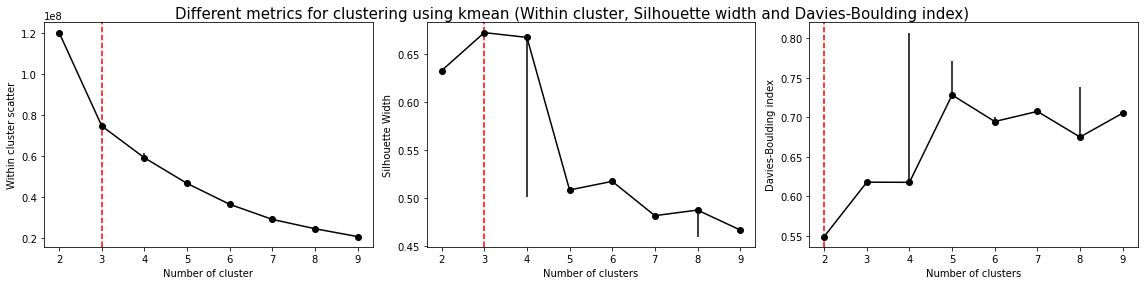

In [7]:
# Nice way to plot each metric w. an errorbar so we can see how stable/unstable the results is.
fig, axs = plt.subplots(1, 3, figsize = (16,4))

axs[0].errorbar(
    num_clusters,
    np.median(within_kmeans, axis=1),
    [
        np.median(within_kmeans, axis = 1) - np.min(within_kmeans, axis = 1),
        np.max(within_kmeans, axis = 1) - np.median(within_kmeans, axis = 1),
    ],
    fmt ='k-o',
)



axs[1].errorbar(
    num_clusters,
    np.median(silhouette_kmeans, axis=1),
    [
        np.median(silhouette_kmeans, axis = 1) - np.min(silhouette_kmeans, axis = 1),
        np.max(silhouette_kmeans, axis = 1) - np.median(silhouette_kmeans, axis = 1),
    ],
    fmt ='k-o',
)



axs[2].errorbar(
    num_clusters,
    np.median(dbs_kmeans, axis=1),
    [
        np.median(dbs_kmeans, axis = 1) - np.min(dbs_kmeans, axis = 1),
        np.max(dbs_kmeans, axis = 1) - np.median(dbs_kmeans, axis = 1),
    ], 
    fmt ='k-o',
)



axs[0].set_ylabel('Within cluster scatter')
axs[0].set_xlabel('Number of cluster')


axs[1].set_ylabel('Silhouette Width')
axs[1].set_xlabel('Number of clusters')


axs[2].set_ylabel('Davies-Boulding index')
axs[2].set_xlabel('Number of clusters')


axs[0].axvline(x=3, color = 'red', ls='--')
axs[1].axvline(x=3, color = 'red', ls='--')
axs[2].axvline(x=2, color = 'red', ls='--')

fig.suptitle('Different metrics for clustering using kmean (Within cluster, Silhouette width and Davies-Boulding index)', 
             fontsize = 15)


fig.tight_layout()

#### Within cluster:
The number of clusters using elbow heuristic method shows that 3 is the "optimal" (kinda sketchy method) number of clusters.

#### Silhouette width:
Using the silhouette width we get a clear winner and that is 3 clusters.

#### Davies-Boulding index:
From the Davies boulding we get that 2 is the optimal number of clusters.


Using the 3 combined metrics above we can be pretty sure that 3 is the optimal number of clusters even though we cannot rule
2,3 or even 4 clusters... So let's make a plot of Kmean using k=2,3,4,5.

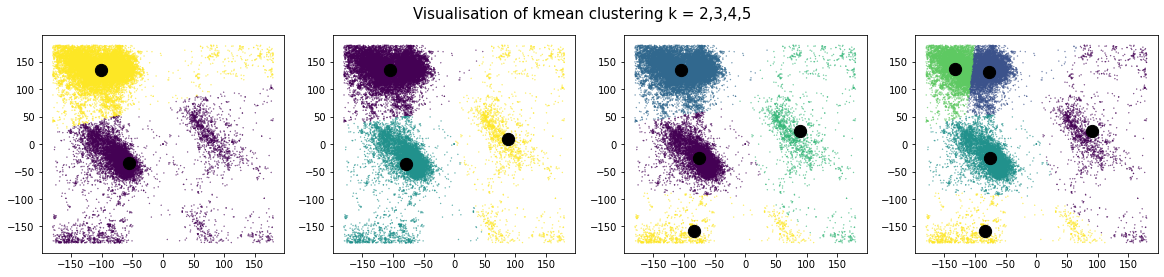

In [7]:
# Scatter plot w. fitted kmean varying k = 2,3,4 and 5.

fig, axs = plt.subplots(1, 4, figsize = (20,4))

for i in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=i, random_state = 666, n_init = 10).fit(data[['phi', 'psi']])
    y_kmeans = kmeans.predict(data[['phi', 'psi']])
    
    axs[i-2].scatter(data = data, x = "phi", y = "psi", c=y_kmeans, s=0.1)
    axs[i-2].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = "black", s = 150)
    
fig.suptitle("Visualisation of kmean clustering k = 2,3,4,5", fontsize = 15)
plt.show()
    

From the scatterplot above note that there is a pretty harsh cut of between the two clusters when k = 2.

Just by eyeballing the scatters either 2,3 or 4 seems to be the best choiche of k. 
If we would just rely on the metrics I would say that the most stable result and probably the best k is 3.

#### 2. b) Validate the clusters that are found with the chosen value of K. Hint: See the slides for Lecture 6, Section Validating clustering.


In [8]:
# There is a few ways we can validate the clusters but the one found in lecture 6 is based on dropping n random observations
# from the data and fit the kmean and see if the clusters is similar to the ones w. all the observations so let's do this.


np.random.seed(666) # seed is set for reproducibility
drop_n = round(0.10 * len(data)) # drop 10% of the data


idxs = np.zeros((drop_n, 5)) #, dtype = float) # Creates index to keep track of observations

# loop that takes 10% random indexes and drop them.
for i in range(0, 5):
    drop_idx = np.random.choice(data.index, drop_n, replace = False)
    idxs[:,i] = drop_idx


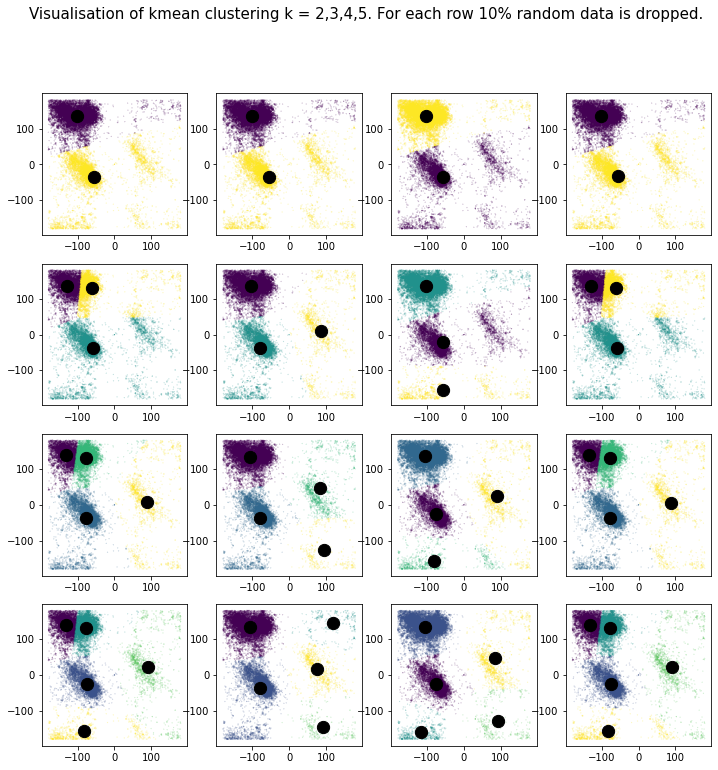

In [10]:
# Almost the same loop as above just that for each number of cluster we drop random 10% observations and repeat 4 times...
# so we get 4 x 4 scatter plots.
fig, axs = plt.subplots(4, 4, figsize = (12,12))

for i in [2, 3, 4, 5]:
    for j in range(0, 4):
        kmeans = KMeans(n_clusters=i, random_state = j, n_init = 1).fit(data.drop(idxs[:,j])[['phi', 'psi']])
        y_kmeans = kmeans.predict(data.drop(idxs[:,j])[['phi', 'psi']])
    
        axs[i-2, j].scatter(data = data.drop(idxs[:,j]), x = "phi", y = "psi", c=y_kmeans, s=0.01)
        axs[i-2, j].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = "black", s = 150)
    
fig.suptitle("Visualisation of kmean clustering k = 2,3,4,5. For each row 10% random data is dropped.", fontsize = 15)
plt.show()

By looking at the scatterplots above we can see that the results by just dropping random 10% of the data makes the kmean predicting different. 

The second row where k = 3 predicts 3 different clusters which shows that the results really depends on the random_state used in kmean and thence the results is unstable.  It is actually much more unstable than what I expected since we have a large dataset with 29369 observations. 

Well I guess one could use more of the information that was given to get a better result ==> More data analysis is required to draw some conclutions.

#### 2. c) Do the clusters found in part (a) seem reasonable

I guess the results found in 2. a) seems reasonable but we cannot be sure that this is right. Why?
Well both the metrics in 2. b) and the validation in 2. c) was pretty uncertain results.

In 2. b) we showed that 3 clusters probably is the best choich but it wasn't a clear winner so we actually cannot rule out k=2,3,4 clusters.

In 2. c) we saw that the results was heavily influenced by both which observations that we dropped but also where the kmean algorithm started.

#### Conclusion: More data analysis is indeed required.


#### 2. d) Can you change the data to get better results (or the same results in a simpler way)? (Hint: since both phi and psi are periodic attributes, you can think of shifting/translating them by some value and then use the modulo operation.)

In [9]:
# Create a new dataset denoted fixed_data.
data = pd.read_csv(r'C:\Users\kindb\Downloads\data_dat405\assignment3-data.csv') # importing data
fixed_data = data

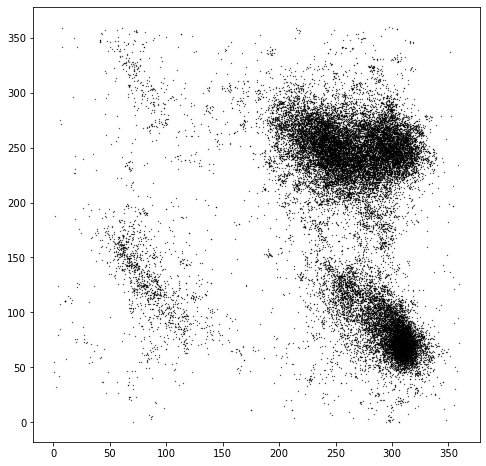

In [10]:

# shift phi w. 10 degrees and psi w. 110 why these values? 
# Well I couldnt find any algortihm doing this so I actullay just by trial and error to see here we don't get any straight
# cut offs from the clusters and arange the data to go from [0,360] instead of [-180, 180].


phi_shift = np.full((fixed_data.shape[0],), 10)
psi_shift = np.full((fixed_data.shape[0],), 110)

fixed_data['phi'] = fixed_data['phi'] + phi_shift
fixed_data['phi'] = fixed_data['phi'] % 360

fixed_data['psi'] = fixed_data['psi'] + psi_shift
fixed_data['psi'] = fixed_data['psi'] % 360

plt.gcf().set_size_inches(8, 8)
plt.scatter(data = fixed_data, x = "phi", y = "psi", s = 0.1, color = "black")
plt.show()

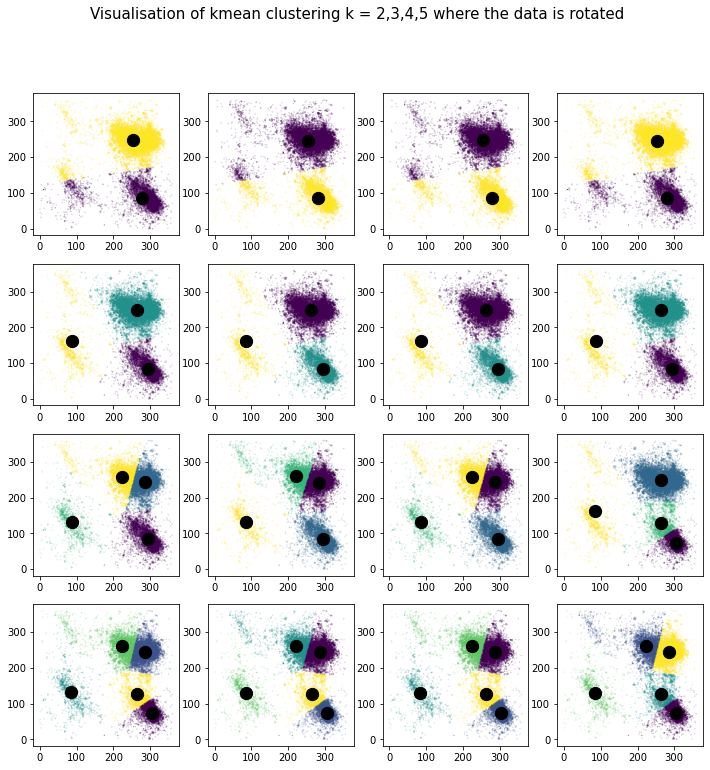

In [13]:
# let's run the exact loop as we did in 2. c) again except that we don't drop any observations
fig, axs = plt.subplots(4, 4, figsize = (12,12))

for i in [2, 3, 4, 5]:
    for j in range(0, 4):
        kmeans = KMeans(n_clusters=i, random_state = j, n_init = 1).fit(fixed_data[['phi', 'psi']])
        y_kmeans = kmeans.predict(fixed_data[['phi', 'psi']])
    
        axs[i-2, j].scatter(data = fixed_data, x = "phi", y = "psi", c=y_kmeans, s=0.01)
        axs[i-2, j].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = "black", s = 150)
    
fig.suptitle("Visualisation of kmean clustering k = 2,3,4,5 where the data is rotated", fontsize = 15)
plt.show()

Note above that random_state is different for each run. It's because I wanted to see if the results were the same regardless of where we start to cluster.

Now that we have nice plots we can see that the results is stable indeed. There is still some ugly cut offs but it is at least better than the original data.

# ---------------------------------------------------------------------------------------------------------------

#### Question 3. Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.
    
# ---------------------------------------------------------------------------------------------------------------

#### 3. a) Motivate:
    
   #### i. the choice of the minimum number of samples in the neighbourhood for a point to be considered as a core point, and
    
   #### ii. the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”).

To be honest I didn't find any algorithm that is able to tune the hyperparameters. After ALOT of trial and error I think that min_number should be somewhere between 100-150 and epsiol 10-15. 

In question 3. d) I investiagated the choiche of hyperparameter further but til then let's set epsilon = 12 and min_samples = 120.

# TO BE ANSWERED...

#### 3. b) Highlight the clusters found using DBSCAN and any outliers in a scatter plot. How many outliers are found? Plot a bar chart to show which amino acid residue types are most frequently outliers.

In [11]:
# Parameters used in dbscan
epsilon = 12
min_samples = 120

db = DBSCAN(eps = epsilon, min_samples = min_samples)

pred_dbscan = db.fit_predict(fixed_data[['phi', 'psi']])

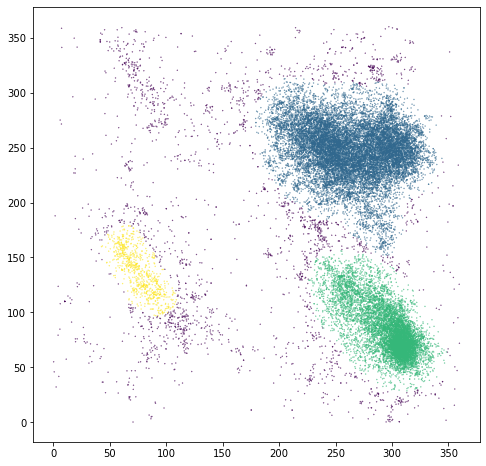

In [12]:
# Scatterplot of phi vs psi using DBSCAN
plt.figure(figsize=(8,8))

plt.scatter(data = fixed_data, x = "phi", y = "psi", c = pred_dbscan, s = 0.1)

plt.show()

In [13]:
residue_names = list(set(fixed_data['residue name'])) # creates a list of residue names

In [14]:
# Creates a datarame of just observations that is spotted as outliers.
outliers = fixed_data[db.labels_ == -1] # db.labels_ == -1 corresponds to outliers.


In [15]:
outliers 

residue name  position chain         phi         psi
9              GLY        19     A  103.478288   83.747204
22             ASP        32     A  209.545811  315.903851
40             SER        50     A  208.795462  320.823914
56             ALA        66     A  227.464825  325.663987
104            GLY       115     A  120.288648   78.462877
...            ...       ...   ...         ...         ...
29189          GLY       193     B  104.562282   90.067716
29289          GLY       293     B  118.580759  116.090040
29307          GLY       311     B   88.623741  304.587104
29331          ALA       341     B  335.762528  208.744502
29368          LYS       378     B  200.048760  204.233680

[2232 rows x 5 columns]

In [17]:
print("Number of spotted outliers:", len(outliers))
print("Fraction of outliers compared to the data:", len(outliers)/len(data))

Number of spotted outliers: 2232
Fraction of outliers compared to the data: 0.07599850182164868


In [18]:
# Sum up each label both for outliers and the complete dataset.
res_names_orginal = np.zeros(len(residue_names))
res_names_outliers = np.zeros(len(residue_names))

for i in range(0, len(residue_names)):
    res_names_orginal[i] = sum((fixed_data['residue name']) == residue_names[i])
    
    res_names_outliers[i] = sum((outliers['residue name']) == residue_names[i])
    
    

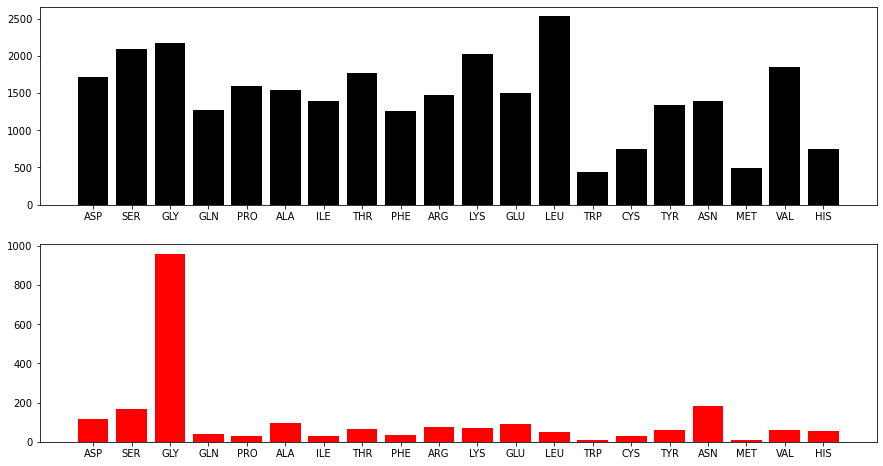

In [19]:
# Create 2 barplots. The first in black is the original data and the second in red is the barplot of just outliers.
fig, axs = plt.subplots(2, 1, figsize = (15,8))

axs[0].bar(residue_names, res_names_orginal, color = "black")
axs[1].bar(residue_names, res_names_outliers, color = "red")


plt.show()

Instead of visualsing the results in two different plot let's create a single plot combining the data.

In [20]:
# Adds a column named "Outlier" that shows if an observation is a outlier (1) or not (0)
fixed_data['Outlier'] = [db.labels_ == -1][0]*1
fixed_data

residue name  position chain         phi         psi  Outlier
0              LYS        10     A  220.687145  252.657714        0
1              PRO        11     A  325.716790  246.002076        0
2              LYS        12     A  250.027379  301.294737        0
3              LEU        13     A  234.682788  247.143523        0
4              LEU        14     A  265.148533  205.928520        0
...            ...       ...   ...         ...         ...      ...
29364          GLY       374     B  222.250443  265.223562        0
29365          GLN       375     B  252.571459  243.019506        0
29366          ILE       376     B  256.413552  222.091970        0
29367          ASN       377     B  269.331221   97.897179        0
29368          LYS       378     B  200.048760  204.233680        1

[29369 rows x 6 columns]

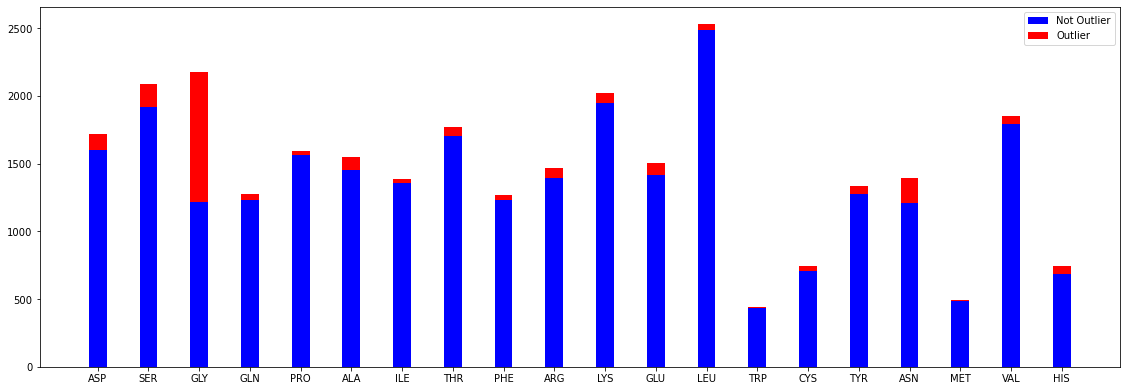

In [21]:
# Creates a barplot of Non-outlier / Outlier for each label.
fig = plt.figure(figsize = (15,5))
ax = fig.add_axes([0,0,1,1])

ax.bar(residue_names, (res_names_orginal - res_names_outliers), width =0.35, color='b')
ax.bar(residue_names, (res_names_outliers), width = 0.35, bottom= (res_names_orginal - res_names_outliers), color='r')
ax.legend(labels=['Not Outlier', 'Outlier']) # very creative name for the non outlier...
plt.show()

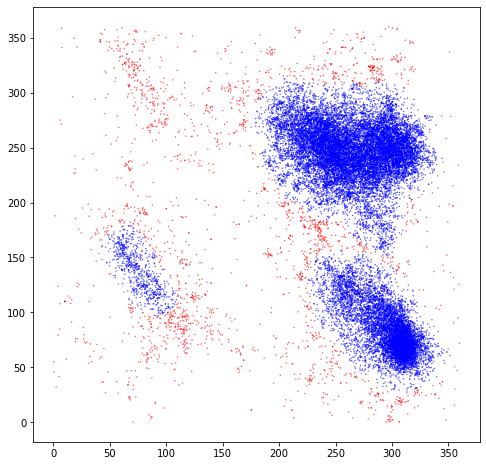

In [22]:
# Creates a simple scatterplot of Outlier/Non-Outlier to see how to observations is distributed.

plt.figure(figsize=(8,8))
plt.scatter(data = fixed_data, x = "phi", y = "psi", c = "Outlier", s = 0.1, cmap = "bwr")

plt.show()

#### 3. c) Compare the clusters found by DBSCAN with those found using K-means.

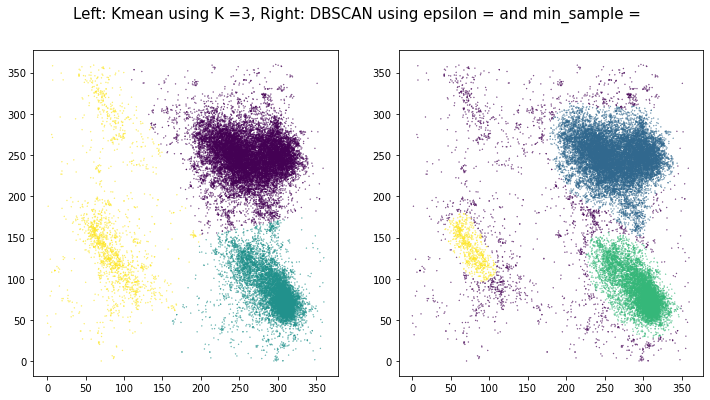

In [23]:
kmeans = KMeans(n_clusters=3, random_state = 1, n_init = 1).fit(data[['phi', 'psi']])
y_kmeans = kmeans.predict(data[['phi', 'psi']])
    


fig, axs = plt.subplots(1, 2, figsize = (12,6))

axs[0].scatter(data = data, x = "phi", y = "psi", c=y_kmeans, s=0.1)
axs[1].scatter(data = fixed_data, x = "phi", y = "psi", c = pred_dbscan, s = 0.1)


fig.suptitle("Left: Kmean using K =3, Right: DBSCAN using epsilon = and min_sample =", fontsize = 15)
plt.show()




From the two scatterplots note that both these two methods finds approximate the same results with a few differences like:

1. DBSCAN also spots outliers which makes the yellow cluster much different from the one found by Kmeans.
2. From the Kmeans method we get a harsh cut off between the purple and the green cluster. Here the DBSCAN method creates a smoother cut off between the two clusters.

#### d. Discuss whether the clusters found using DBSCAN are robust to small changes in the minimum number of samples in the neighbourhood for a point to be considered as a core point, and/or the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”).

In [86]:

# Varying epsilon between 4 and 19 and min_samples between 50 to 200
eps_arr = np.arange(4, 19, 1)
min_arr = np.arange(50, 200, 10)


# Empty array to store the results in.
cluster = []

start = time.time()

for i in range(0, len(eps_arr)):
    print('Iter:', i+1)
    for j in range(0, len(min_arr)):
        
        # DBSCAN and prediction using the DBSCAN
        db = DBSCAN(eps = eps_arr[i], min_samples = min_arr[j])
        pred_dbscan = db.fit_predict(fixed_data[['phi', 'psi']])
        
        # Saving results.
        cluster.append(db.labels_)

print("Elapsed time:", (time.time() - start),"sec")        
        
          

Iter: 1
Iter: 2
Iter: 3
Iter: 4
Iter: 5
Iter: 6
Iter: 7
Iter: 8
Iter: 9
Iter: 10
Iter: 11
Iter: 12
Iter: 13
Iter: 14
Iter: 15
Elapsed time: 205.9578034877777 sec


In [92]:
# Creates a matrix to store the results in.

num_clusters =  []

for j in range(0, len(cluster)):
    num_clusters.append(len(np.unique(cluster[j]))-1)
    
n_clust_matrix = np.asarray(num_clusters).reshape((len(eps_arr), len(eps_arr)))

In [96]:
n_clust_matrix # let's visualizse these results w. matshow instead...

array([[3, 5, 7, 2, 3, 4, 2, 2, 2, 3, 7, 5, 6, 4, 3],
       [7, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3],
       [6, 6, 4, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2],
       [3, 4, 4, 5, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3],
       [6, 3, 3, 5, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [5, 6, 3, 3, 3, 4, 4, 5, 2, 2, 2, 2, 2, 2, 2],
       [3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 2, 3, 2, 2, 2],
       [3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 2, 2, 2],
       [3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4],
       [3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4],
       [3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3],
       [3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3],
       [3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

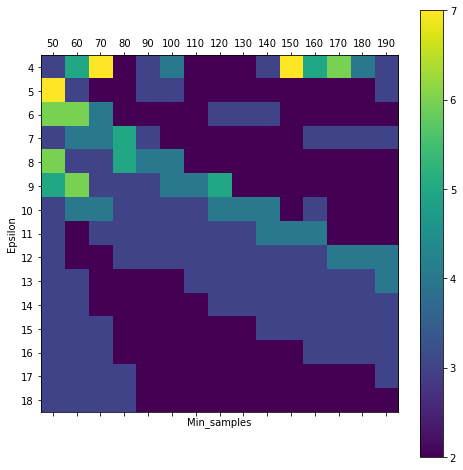

In [108]:
matfig = plt.figure(figsize=(8,8))
plt.matshow(n_clust_matrix, fignum=matfig.number)
plt.colorbar()
plt.yticks(range(len(eps_arr)), eps_arr)
plt.xticks(range(len(min_arr)), min_arr)

plt.xlabel('Min_samples')
plt.ylabel('Epsilon')

plt.show()

In [109]:
print("Mean number of clusters:", np.mean(n_clust_matrix))
print("Median number of cluster", np.median(n_clust_matrix))

Mean number of clusters: 2.8266666666666667
Median number of cluster 3.0


I don't know if this is a valid way to find out how many cluster there should be but both the mean/median suggests that it should be approximate 3 different cluster which is exactly the as we got when we used kmeans.

To answer the question wheter the algorithm DBSCAN is robust to small changes or not.
#### Answer: No, when we take small steps with either epsilon or min_samples it changes the cluster by alot so tuning the hyperparameter is very delicate and hard since there is no really good algorithm to do is.

Instead one need to have good domain expertise which is hard as a data-scientist modelling biologi. So in this case the optimal solution to understanding the domain and tune the hyperparameters would we to team up with a biologist that has the domain knowledge. In this case when we don't have the domain expertise one has to combine the results from both the kmean and DBSCAn result and thus we end up with that the optimal number of cluster should be 3.

4. The data file can be stratified by amino acid residue type. 
    
    a) Use DBSCAN to cluster the data that have residue type PRO. Investigate how 
    the clusters found for amino acid residues of type PRO differ from the general 
    clusters (i.e., the clusters that you get from DBSCAN with mixed residue types 
    in question 3). 
    
    b) Now use DBSCAN to cluster the data that have residue type GLY. Investigate 
    how the clusters found for amino acid residues of type GLY differ from the 
    general clusters.

In [24]:
# Creates two dataframes filtering out just PRO and GLY respectively.
data_PRO = fixed_data[fixed_data['residue name'] == "PRO"]
data_GLY = fixed_data[fixed_data['residue name'] == "GLY"]

In [25]:
print("Number of observations PRO:", len(data_PRO))
print("Number of observations GLY:", len(data_GLY))

Number of observations PRO: 1596
Number of observations GLY: 2176


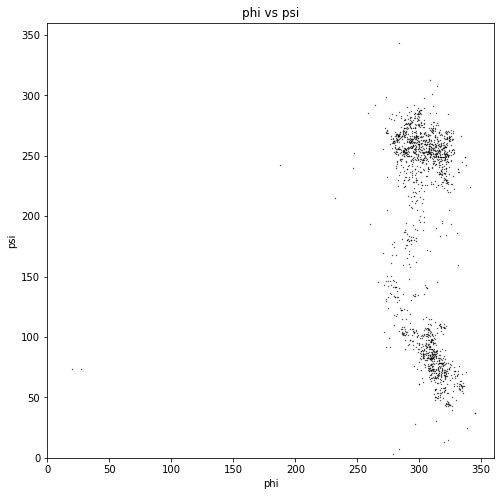

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(data_PRO['phi'], data_PRO['psi'], s = 0.1, color = "black")

plt.xlim(0, 360)
plt.ylim(0, 360)

plt.title('phi vs psi')
plt.xlabel('phi')
plt.ylabel('psi')

plt.show()

At first glance the scatterplot of PRO above seems to be either one larger cluster or two clusters, let's investigate this further by using DBSCAN.

In [110]:
# Varying epsilon and min_samples systematically.
eps_arr = np.arange(8, 21, 1)
min_arr = np.arange(30, 160, 10)


# Storing results
cluster_PRO = []
pred_dbscan_res = []


start = time.time()
for i in range(0, len(eps_arr)):
    print("iter:", i+1)
    for j in range(0, len(min_arr)):
        # Fit the DBSCAN model.
        db = DBSCAN(eps = eps_arr[i], min_samples = min_arr[j])
        pred_dbscan = db.fit_predict(data_PRO[['phi', 'psi']])
         
            
        # Saving results
        pred_dbscan_res.append(pred_dbscan)
        cluster_PRO.append(db.labels_)
        
print("Elapsed time:", (time.time() - start),"sec") 

iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
iter: 9
iter: 10
iter: 11
iter: 12
iter: 13
Elapsed time: 2.8444268703460693 sec


In [62]:
pred_dbscan_res # list of arrays containing prediction using DBSCAN, eps and min_sample varying.

[array([ 0,  1, -1, ...,  0,  0,  1], dtype=int64),
 array([ 0,  1, -1, ...,  0,  0,  1], dtype=int64),
 array([ 1,  0, -1, ...,  1,  1,  0], dtype=int64),
 array([ 1,  0, -1, ...,  1,  1,  0], dtype=int64),
 array([ 1,  0, -1, ...,  1,  1,  0], dtype=int64),
 array([ 1,  0, -1, ...,  1,  1,  0], dtype=int64),
 array([ 1,  0, -1, ...,  1,  1,  0], dtype=int64),
 array([ 1,  0, -1, ..., -1,  1,  0], dtype=int64),
 array([ 1,  0, -1, ..., -1,  1,  0], dtype=int64),
 array([-1, -1, -1, ..., -1,  0, -1], dtype=int64),
 array([-1, -1, -1, ..., -1,  0, -1], dtype=int64),
 array([-1, -1, -1, ..., -1, -1, -1], dtype=int64),
 array([-1, -1, -1, ..., -1, -1, -1], dtype=int64),
 array([ 0,  1, -1, ...,  0,  0,  1], dtype=int64),
 array([ 0,  1, -1, ...,  0,  0,  1], dtype=int64),
 array([ 0,  1, -1, ...,  0,  0,  1], dtype=int64),
 array([ 0,  1, -1, ...,  0,  0,  1], dtype=int64),
 array([ 1,  0, -1, ...,  1,  1,  0], dtype=int64),
 array([ 1,  0, -1, ...,  1,  1,  0], dtype=int64),
 array([ 1, 

In [71]:
# Rearrange the data so we can create nice scatterplots.
dbscan_arrays_PRO = []

for i in range(0, 13):
    dbscan_arrays_PRO.append(pred_dbscan_res[(i)*len(eps_arr)+1: (i+1)*len(eps_arr)+1])



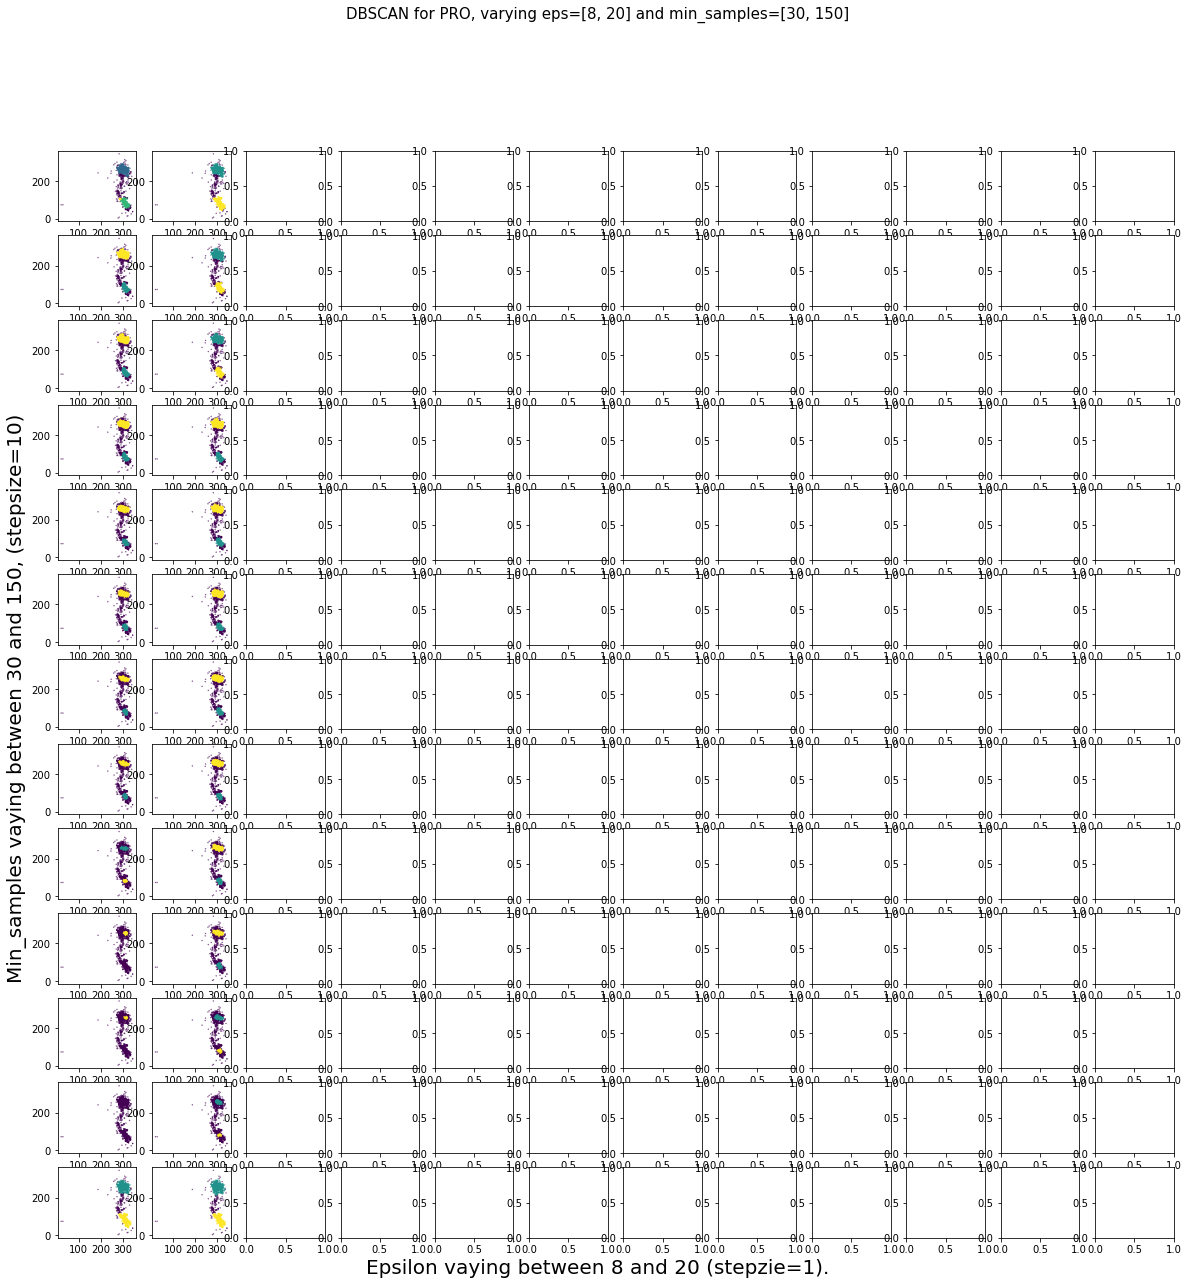

In [130]:


fig, axs = plt.subplots(len(eps_arr), len(eps_arr)-1, figsize = (20,20))

for i in range(0, len(eps_arr)):
    for j in range(0, 12):
    
    
        axs[i, j].scatter(data = data_PRO, x = "phi", y = "psi", c=dbscan_arrays_PRO[j][i], s=0.1)

    
fig.suptitle("DBSCAN for PRO", fontsize = 15)

fig.text(0.5, 0.1, 'Epsilon vaying between 8 and 20 (stepzie=1).', ha='center', fontsize = 20)
fig.text(0.09, 0.5, 'Min_samples vaying between 30 and 150, (stepsize=10)', va='center', rotation='vertical', fontsize = 20)

plt.show()



The huge scatterplot above is 

In [39]:
num_clusters_PRO =  []

for j in range(0, len(cluster_PRO)):
    num_clusters_PRO.append(len(np.unique(cluster_PRO[j]))-1)
    

n_clust_matrix_PRO = np.asarray(num_clusters_PRO).reshape((len(eps_arr), len(eps_arr)))

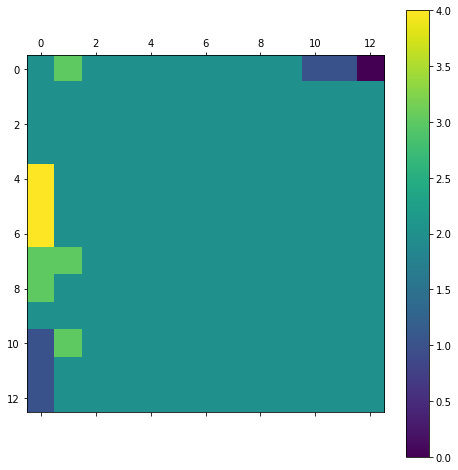

In [40]:
matfig = plt.figure(figsize=(8,8))
plt.matshow(n_clust_matrix_PRO, fignum=matfig.number)
plt.colorbar()
plt.show()

In [41]:
print("Mean number of clusters:", np.mean(n_clust_matrix_PRO))
print("Median number of cluster", np.median(n_clust_matrix_PRO))

Mean number of clusters: 2.0236686390532546
Median number of cluster 2.0


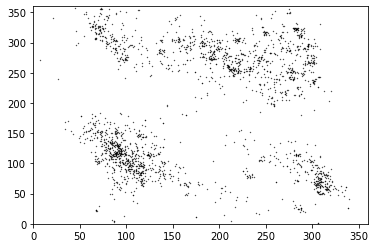

In [79]:
plt.scatter(data_GLY['phi'], data_GLY['psi'], s = 0.1, color = "black")
plt.xlim(0, 360)
plt.ylim(0, 360)
plt.show()

In [102]:
eps_arr = np.arange(19, 32, 1)
min_arr = np.arange(40, 170, 10)


cluster_GLY = []
pred_dbscan_res = []

start = time.time()

for i in range(0, len(eps_arr)):
    print("Iter:", i+1)
    for j in range(0, len(min_arr)):
        db = DBSCAN(eps = eps_arr[i], min_samples = min_arr[j])
        pred_dbscan = db.fit_predict(data_GLY[['phi', 'psi']])
        
        
        pred_dbscan_res.append(pred_dbscan)
        cluster_GLY.append(db.labels_)
        
print("Elapsed time:", (time.time() - start),"sec") 

Iter: 1
Iter: 2
Iter: 3
Iter: 4
Iter: 5
Iter: 6
Iter: 7
Iter: 8
Iter: 9
Iter: 10
Iter: 11
Iter: 12
Iter: 13
Elapsed time: 3.574441432952881 sec


In [103]:
dbscan_arrays_GLY = []

for i in range(0, 13):
    dbscan_arrays_GLY.append(pred_dbscan_res[(i)*len(eps_arr)+1: (i+1)*len(eps_arr)+1])



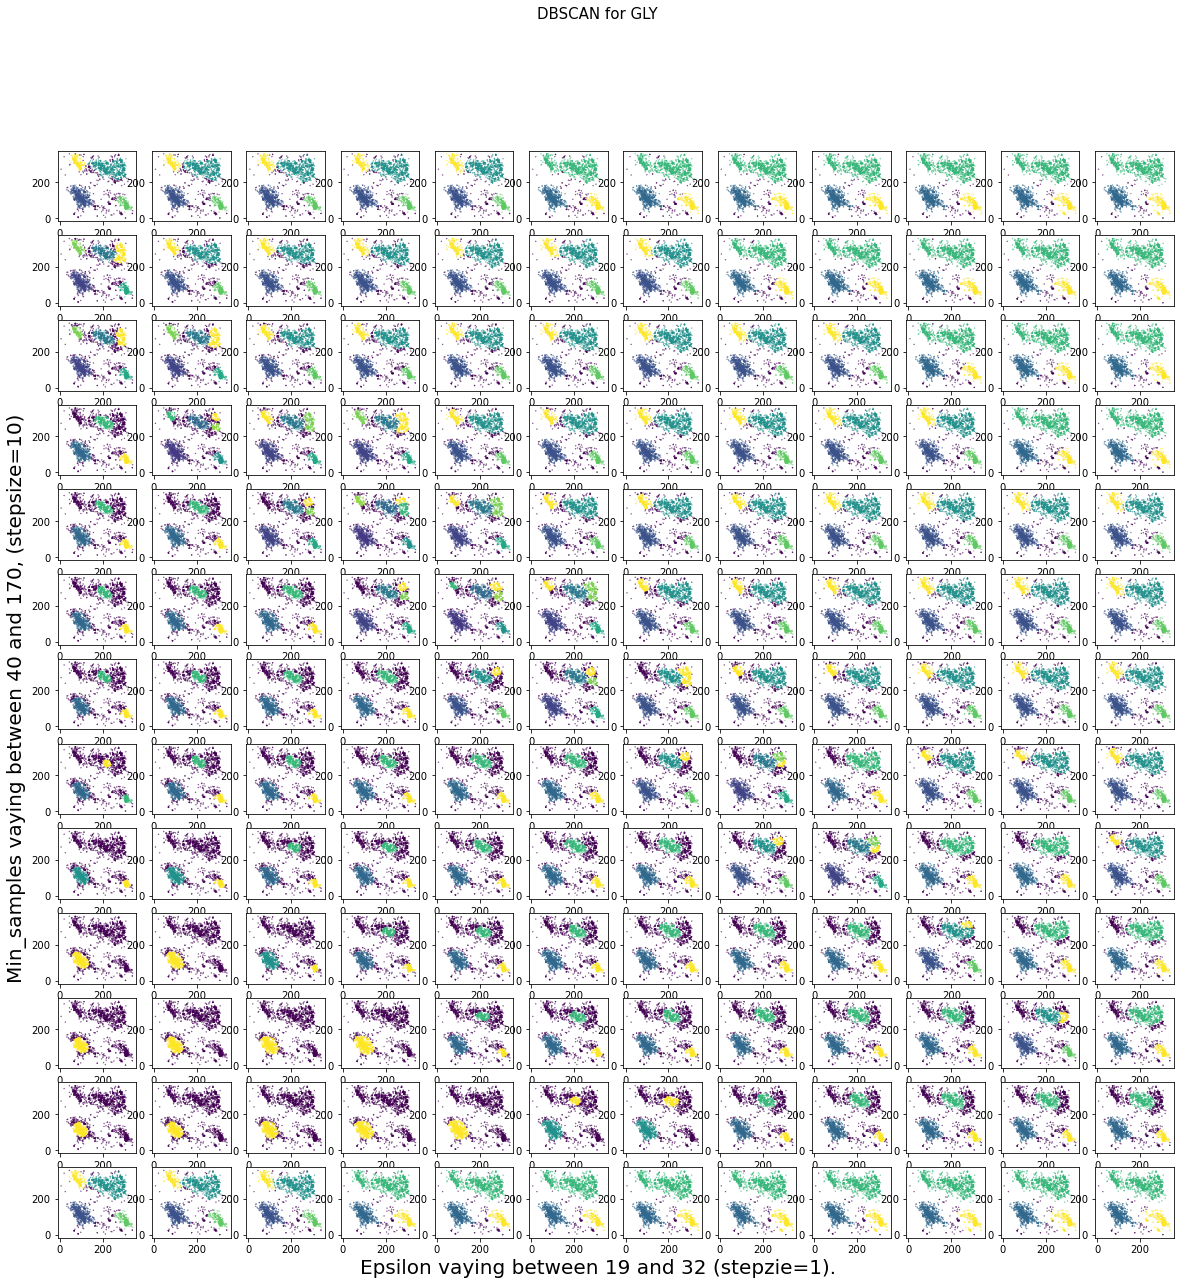

In [133]:
fig, axs = plt.subplots(len(eps_arr), len(eps_arr)-1, figsize = (20,20))




for i in range(0, len(eps_arr)):
    for j in range(0, 12):
    
    
        axs[i, j].scatter(data = data_GLY, x = "phi", y = "psi", c=dbscan_arrays_GLY[j][i], s=0.1)
 
fig.suptitle("DBSCAN for GLY", fontsize = 15)

fig.text(0.5, 0.1, 'Epsilon vaying between 19 and 32 (stepzie=1).', ha='center', fontsize = 20)
fig.text(0.09, 0.5, 'Min_samples vaying between 40 and 170, (stepsize=10)', va='center', rotation='vertical', fontsize = 20)

plt.show()

In [107]:
num_clusters_GLY =  []

for j in range(0, len(cluster_GLY)):
    num_clusters_GLY.append(len(np.unique(cluster_GLY[j]))-1)
    

n_clust_matrix_GLY = np.asarray(num_clusters_GLY).reshape((len(eps_arr), len(eps_arr)))

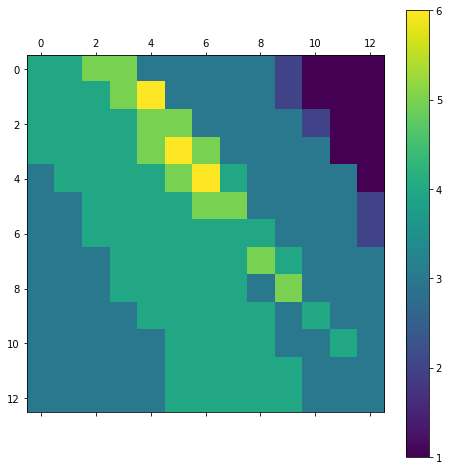

In [108]:
matfig = plt.figure(figsize=(8,8))
plt.matshow(n_clust_matrix_GLY, fignum=matfig.number)
plt.colorbar()
plt.show()

In [109]:
print("Mean number of clusters:", np.mean(n_clust_matrix_GLY))
print("Median number of cluster", np.median(n_clust_matrix_GLY))

Mean number of clusters: 3.396449704142012
Median number of cluster 3.0


### Conclusions:

First of all I couldn't find and systematically approach for tuning the hyperparameter using DBSCAN.
So instead I used the results that visually looked best by creating a huge matrix of scatterplots where on the X-axis Epsilon varies and on the Y-axis Min_samples varies. 

#### What to look out for?

1. Whenever I saw that all observations was marked as outlier one has to change the parameters.
2. When there was a straight cut-off
3. When the cluster algorithm DBSCAN only created a single large cluster.

From the Matrix showing number of cluster we can conclude that the first dataset containing only the residue name PRO is probably 2 different cluster and the second dataset containing only the residue name GLY it most likely is 3 different cluster.


#### Improvements

1. KMEAN or some other clustering method could also be used on the two datasets PRO and GLY for comparsions.
2. Cluster stability i.e removing random 10% for example and see if we get the same results.
3. Shift the data in some other way. why? Well since the dataset of PRO had 2 observations far to the right. Shifting the data in some other way can probably lump togheter all clust
4. Potentially drop outliers if the change to much in the data (Here one must be very careful). 